<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Talleres/2b_Deteccion_de_anomalias_IF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 2b: Detección de anomalías con Isolation Forest



In [11]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline

random_state = 1234

In [12]:
### FUNCIONA EN LINUX ###

# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e' -O creditcard.pkl

### FUNCIONA EN WINDOWS ###
import requests

url = 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e'
output_file = 'creditcard.pkl'

response = requests.get(url)
with open(output_file, 'wb') as f:
    f.write(response.content)

In [13]:
#Cargamos los datos
df = pd.read_pickle('creditcard.pkl')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Class
0    284315
1       492
Name: count, dtype: int64


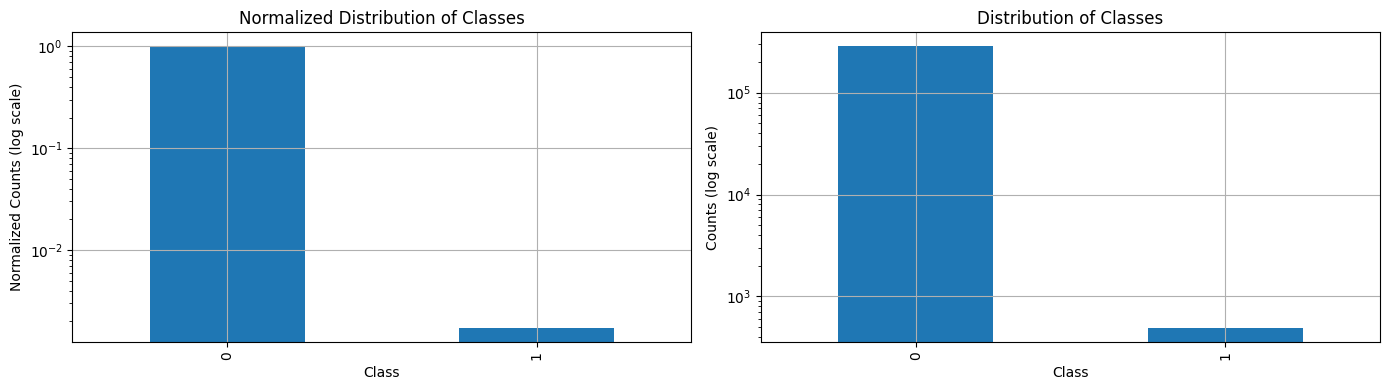

In [14]:
#Exploramos la variable objetivo
print(df['Class'].value_counts(normalize=True))
print(df['Class'].value_counts())
      
# Crear un nuevo subplot con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Gráfica con normalización
axs[0].set_yscale('log')  # Utiliza una escala logarítmica en el eje y
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Normalized Counts (log scale)')
axs[0].set_title('Normalized Distribution of Classes')
df.Class.value_counts(normalize=True).plot(kind='bar', grid=True, ax=axs[0])

# Gráfica sin normalización
axs[1].set_yscale('log')  # Utiliza una escala logarítmica en el eje y
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Counts (log scale)')
axs[1].set_title('Distribution of Classes')
df.Class.value_counts().plot(kind='bar', grid=True, ax=axs[1])

plt.tight_layout()
plt.show()

In [15]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Class'),
    df['Class'],
    test_size=0.2,
    stratify=df['Class'],
    random_state=random_state
)

In [ ]:
#Entrenaremos un classificador RandomForest para resolver este problema
rf_base = RandomForestClassifier(random_state=random_state)

pipeline_rf = Pipeline(steps = [
        ('classifier', rf_base),
                            ])

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, param_grid=param_grid)

In [ ]:
# Entrenemos el random forest:
rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [50, 100]})

In [ ]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50}

In [ ]:
# Obtengamos la accuracy y el F1 score de entrenamiento
print("Training set")
print(f'Accuracy: {rf.score(X_train, y_train)}')
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro')}")
print('\n')

Training set
Accuracy: 0.9996576620070662
F1 score: 0.9452924324533583




In [ ]:
# Obtengamos la accuracy y el F1 score de prueba para cada modelo:
print("Test set")
print(f'Accuracy: {rf.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro')}")
print('\n')

Test set
Accuracy: 0.9995962220427653
F1 score: 0.9363629832748375




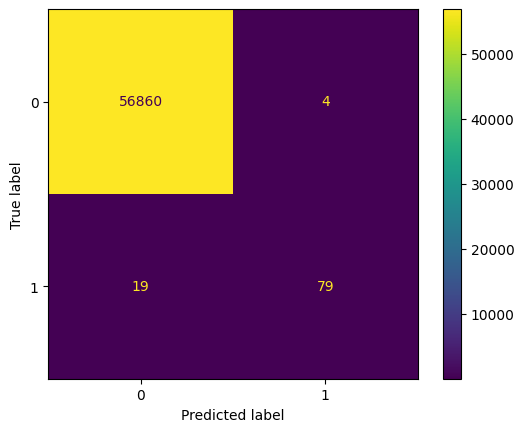

In [ ]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Isolation Forest 1 (GridSearchCV Scoring: custom_fbeta_score)

In [32]:
#Ahora, entrenemos un modelo basado en Isolation Forest
#Tip: Isolation forest de sklearn devuelve -1 para outliers y 1 para inliers.
#Por esta razón, se deben mapear los -1 devueltos por el modelo para poder calcular
#las métricas de validación que se utilizan

# Importar las bibliotecas necesarias
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, recall_score

anomaly_proportion = df['Class'].value_counts(normalize=True)[1]

# Construir el pipeline
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('model', IsolationForest(random_state=random_state))
])

# Definir los parámetros para GridSearchCV
parameters = {
    'model__n_estimators': [25, 50, 100, 200, 300, 400],
    'model__contamination': [anomaly_proportion/2, anomaly_proportion]
    # 'n_estimators': list(range(100, 800, 5),
    # 'max_samples': list(range(100, 500, 5))
}

def custom_fbeta_score(y_true, y_pred):
    # Calcula el F-beta score (beta=2)
    score = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    # Devuelve el inverso del score para minimizar la métrica
    return -score

# Define el scorer (Recall: B>1)
scorer = make_scorer(custom_fbeta_score)

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring=scorer)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros encontrados por GridSearchCV:", grid_search.best_params_)

# Obtén la mejor puntuación
best_score = grid_search.best_score_
print("Mejor puntuación:", best_score)

Mejores parámetros encontrados por GridSearchCV: {'model__contamination': 0.001727485630620034, 'model__n_estimators': 200}
Mejor puntuación: -1.0146872918101625e-05


In [33]:
# Calcular el accuracy y F1 score de Isolation forest en los conjuntos de entrenamiento y test

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo
predicciones = best_model.predict(X_test)

# Ajustar las predicciones del modelo
predicciones_ajustadas = [0 if x == 1 else 1 for x in predicciones]

# Calcular la precisión
precision = accuracy_score(y_test, predicciones_ajustadas)
print("Precisión:", precision)

# Calcular el F1 score
f1 = f1_score(y_test, predicciones_ajustadas, average='macro')
print("F1 score:", f1)

# Calcular el recall
recall = recall_score(y_test, predicciones_ajustadas)
print("recall_score:", recall)

Precisión: 0.9977528878901724
F1 score: 0.6794372340051352
recall_score: 0.3673469387755102


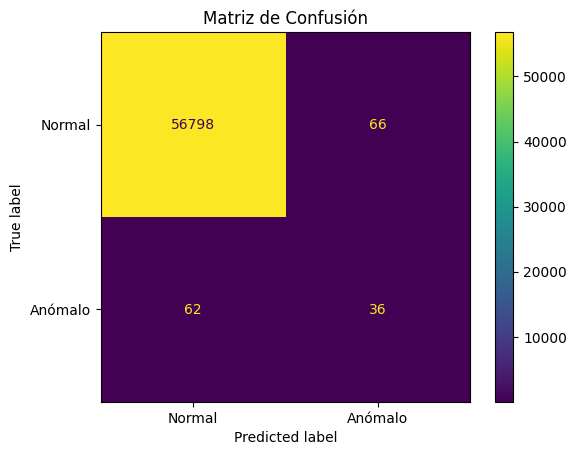

In [34]:
# Graficar la matriz de confusión para Isolation forest

cm = confusion_matrix(y_test, predicciones_ajustadas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anómalo"])
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# 

# Isolation Forest 2 (GridSearchCV Scoring: Default)

In [35]:
#Ahora, entrenemos un modelo basado en Isolation Forest
#Tip: Isolation forest de sklearn devuelve -1 para outliers y 1 para inliers.
#Por esta razón, se deben mapear los -1 devueltos por el modelo para poder calcular
#las métricas de validación que se utilizan

# Importar las bibliotecas necesarias
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score

anomaly_proportion = df['Class'].value_counts(normalize=True)[1]

# Construir el pipeline
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('model', IsolationForest(random_state=random_state))
])

# Definir los parámetros para GridSearchCV
parameters = {
    'model__n_estimators': [25, 50, 100, 200, 300, 400],
    'model__contamination': [anomaly_proportion/2, anomaly_proportion, anomaly_proportion*2]
    # 'n_estimators': list(range(100, 800, 5),
    # 'max_samples': list(range(100, 500, 5))
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros encontrados por GridSearchCV:", grid_search.best_params_)

# Obtén la mejor puntuación
best_score = grid_search.best_score_
print("Mejor puntuación:", best_score)

Mejores parámetros encontrados por GridSearchCV: {'model__contamination': 0.000863742815310017, 'model__n_estimators': 25}
Mejor puntuación: 0.0015317430709473547


In [36]:
# Calcular el accuracy y F1 score de Isolation forest en los conjuntos de entrenamiento y test

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo
predicciones = best_model.predict(X_test)

# Ajustar las predicciones del modelo
predicciones_ajustadas = [0 if x == 1 else 1 for x in predicciones]

# Calcular la precisión
precision = accuracy_score(y_test, predicciones_ajustadas)
print("Precisión:", precision)

# Calcular el F1 score
f1 = f1_score(y_test, predicciones_ajustadas, average='macro')
print("F1 score:", f1)

# Calcular el recall
recall = recall_score(y_test, predicciones_ajustadas)
print("recall_score:", recall)

Precisión: 0.9977002212000983
F1 score: 0.5822268096392565
recall_score: 0.1326530612244898


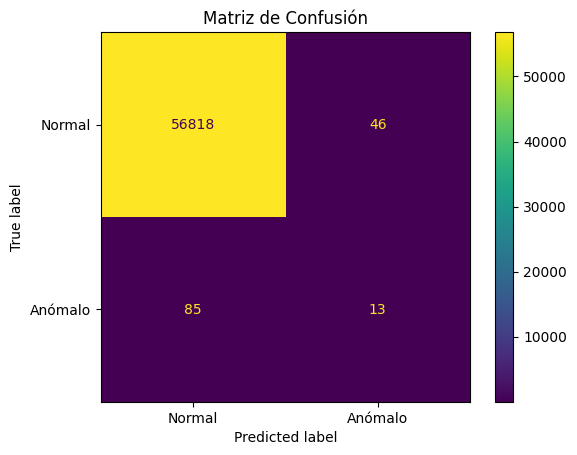

In [37]:
# Graficar la matriz de confusión para Isolation forest

cm = confusion_matrix(y_test, predicciones_ajustadas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anómalo"])
disp.plot()
plt.title("Matriz de Confusión")
plt.show()